# IMPORTS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# custom functions and packages loader
import imports_and_functions as fun
from imports_and_functions.packages import *

# notebook styling packages
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')
## to reset to default theme
# jtplot.reset()

# OBTAIN

The data is obtained from <i>UCI Machine Learning Repository</i>, titled <b>"Productivity Prediction of Garment Employees Data Set"</b> by [Abdullah Al Imran](abdalimran@gmail.com)[1]. Which can be found [here](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#). A copy of the data is in this repository at `/data/garments_worker_productivity.csv`.

<br>
Data with explanation.

 - `date`: Date in MM-DD-YYYY.
 - `day`: Day of the Week.
 - `quarter`: A portion of the month. A month was divided into four quarters.
 - `department`: Associated department with the instance.
 - `team_no`: Associated team number with the instance.
 - `no_of_workers`: Number of workers in each team.
 - `no_of_style_change`: Number of changes in the style of a particular product.
 - `targeted_productivity`: Targeted productivity set by the Authority for each team for each day.
 - `smv`: Standard Minute Value, it is the allocated time for a task.
 - `wip`: Work in progress. Includes the number of unfinished items for products.
 - `over_time`: Represents the amount of overtime by each team in minutes.
 - `incentive`: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
 - `idle_time`: The amount of time when the production was interrupted due to several reasons.
 - `idle_men`: The number of workers who were idle due to production interruption.
 - `actual_productivity`: The actual % of productivity that was delivered by the workers. It ranges from 0-1.


<br>


___
[1]  ```Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. ```



<!--  Rahim, Md Shamsur, Abdullah Al Imran, and Tanvir Ahmed. “Mining the Productivity Data of Garment Industry.” International Journal of Business Intelligence and Data Mining 1, no. 1 (2021): 1. https://doi.org/10.1504/ijbidm.2021.10028084.  -->
 

<br>
<p class="normal">@article{Rahim_2021,
<br>	doi = {10.1504/ijbidm.2021.10028084},
<br>	url = {<a href="https://doi.org/10.1504%2Fijbidm.2021.10028084">[Web Link]</a>},
<br>	year = 2021,
<br>	publisher = {Inderscience Publishers},
<br>	volume = {1},
<br>	number = {1},
<br>	pages = {1},
<br>	author = {Md Shamsur Rahim and Abdullah Al Imran and Tanvir Ahmed},
<br>	title = {Mining the Productivity Data of Garment Industry},
<br>	journal = {International Journal of Business Intelligence and Data Mining}
<br>}
</p>

# SCRUB & EXPLORE

## data

In [3]:
# loading data
df = pd.read_csv('./data/garments_worker_productivity.csv')

In [4]:
df.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
884,2/23/2015,Quarter4,finishing,Monday,10,0.80,3.94,NaN,2400,0,0.0,0,0,20.0,0.955792
216,1/13/2015,Quarter2,finishing,Tuesday,4,0.35,4.30,NaN,2160,0,0.0,0,0,12.0,0.952020
669,2/8/2015,Quarter2,finishing,Sunday,6,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.610208
1091,3/7/2015,Quarter1,finishing,Saturday,5,0.35,3.94,NaN,2400,0,0.0,0,0,10.0,0.805750
134,1/8/2015,Quarter2,finishing,Thursday,2,0.80,3.94,NaN,1440,0,0.0,0,0,8.0,0.835758
942,2/25/2015,Quarter4,finishing,Wednesday,9,0.70,2.90,NaN,960,0,0.0,0,0,8.0,0.410833
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
262,1/15/2015,Quarter3,finishing,Thursday,5,0.65,4.15,NaN,1440,0,0.0,0,0,8.0,0.860653
168,1/10/2015,Quarter2,sweing,Saturday,5,0.50,20.79,966.0,7680,0,0.0,0,0,56.0,0.388008
844,2/19/2015,Quarter3,finishing,Thursday,3,0.50,5.13,NaN,2880,0,0.0,0,0,12.0,0.816406


In [43]:
df.describe().transpose().round(2).style.format("{0:,.2f}")

,count,mean,std,min,25%,50%,75%,max
team,"1,197.00",6.43,3.46,1.00,3.00,6.00,9.00,12.00
targeted_productivity,"1,197.00",0.73,0.10,0.35,0.70,0.75,0.80,0.80
smv,"1,197.00",15.06,10.94,2.90,3.94,15.26,24.26,54.56
wip,"1,197.00",687.23,"1,514.58",0.00,0.00,586.00,"1,083.00","23,122.00"
over_time,"1,197.00","4,567.46","3,348.82",0.00,"1,440.00","3,960.00","6,960.00","25,920.00"
incentive,"1,197.00",38.21,160.18,0.00,0.00,0.00,50.00,"3,600.00"
idle_time,"1,197.00",0.73,12.71,0.00,0.00,0.00,0.00,300.00
idle_men,"1,197.00",0.37,3.27,0.00,0.00,0.00,0.00,45.00
no_of_style_change,"1,197.00",0.15,0.43,0.00,0.00,0.00,0.00,2.00
no_of_workers,"1,197.00",34.61,22.20,2.00,9.00,34.00,57.00,89.00


In [6]:
# fun.distribution_of_features(df,color_plot='silver')

## Feature engineering

### Creating target; `performance`

In [7]:
# binary target class, int
lst = []
for x in zip(df.targeted_productivity, df.actual_productivity):
    # % change in variables
    delta = np.log(x[1] / x[0])
    if delta < 0:
        lst.append(0)
    else:
        lst.append(1)
df['performance'] = lst

In [8]:
df.performance.value_counts(1)

1    0.730994
0    0.269006
Name: performance, dtype: float64

### cleaning `wip`

In [9]:
# filling NaN's with 0, meaning no wip for that session
df['wip'] = df['wip'].fillna(0)

### text cleaning in `department` categories 

In [10]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [11]:
# cleaning spaces
df['department'] = df['department'].str.strip()
# checking
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

### cleaning `targeted_productivity`

In [12]:
# correcting possible error in data
df[df.targeted_productivity<.3]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,performance
633,2/5/2015,Quarter1,sweing,Thursday,7,0.07,24.26,1608.0,6960,0,0.0,0,0,58.0,0.522845,1


targeted_productivity stats:
******************************
mode: 0.8
mean: 0.73
25% quantile: 0.7
******************************


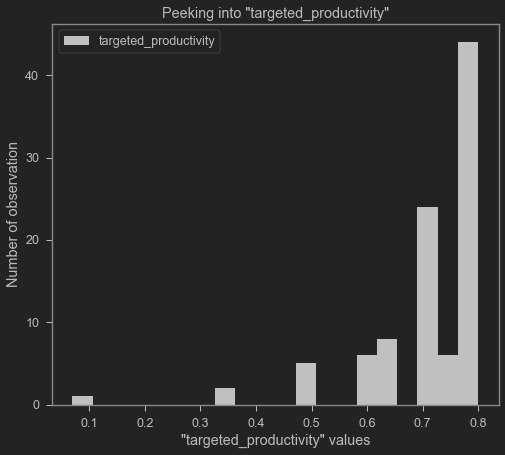

In [13]:
df[df.team == 7]['targeted_productivity'].hist(color='silver',
                                               grid=False,
                                               legend=True,
                                               bins=20)
plt.title('Peeking into "targeted_productivity"')
plt.xlabel('"targeted_productivity" values')
plt.ylabel('Number of observation')

print(f"""targeted_productivity stats:
{'*'*30}
mode: {df.targeted_productivity.mode()[0]}
mean: {round(df.targeted_productivity.mean(),2)}
25% quantile: {df.targeted_productivity.quantile(.25)}
{'*'*30}""")

In [14]:
df.at[df[df.targeted_productivity < .3].index,
      'targeted_productivity'] = df.targeted_productivity.quantile(.25)

df[df.targeted_productivity < .3]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,performance


### drop features

In [15]:
df.drop(columns=['date', 'actual_productivity'], inplace=True)

### dtype casting

In [16]:
df.dtypes

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
performance                int64
dtype: object

In [17]:
df['quarter'] = df['quarter'].astype('category')
df['department'] = df['department'].astype('category')
df['day'] = df['day'].astype('category')

In [18]:
df.dtypes

quarter                  category
department               category
day                      category
team                        int64
targeted_productivity     float64
smv                       float64
wip                       float64
over_time                   int64
incentive                   int64
idle_time                 float64
idle_men                    int64
no_of_style_change          int64
no_of_workers             float64
performance                 int64
dtype: object

## EDA

___

Data preparation for visuals

In [19]:
# custom colour pallate
cust_pal = ['#f22b07', 'lime']
cust_pal2 = ['gold', 'silver']
# dataset for eda
df_eda = df.copy()

# binning data for visuals
#### smv ###
df_eda['smv_bin'] = pd.qcut(x=df_eda.smv,
                            q=4,
                            labels=['quick', 'normal', 'long', 'extra_long'])
#### wip ####
# filling NaN's with 0, meaning no wip for that session
df_eda['wip'] = df_eda['wip'].fillna(0)
# intervals for binning
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 150), (150, 500), (500, 2500),
                                     (2500, 1e6)],
                                    closed='left')
# binning
wip_size = pd.cut(df_eda['wip'].tolist(), bins=bins)
# naming categories
wip_size.categories = ['no_wip', 'small', 'med', 'large', 'xl']
# appending to df_eda
df_eda['wip_bin'] = wip_size

#### incentive ####
# intervals for binning
bins = pd.IntervalIndex.from_tuples([(0, 30), (30, 80), (80, 500), (500, 2500),
                                     (2500, 1e6)],
                                    closed='left')
# binning
incentive_size = pd.cut(df_eda['incentive'].tolist(), bins=bins)
# naming categories
incentive_size.categories = ['no_incentive', 'minor', 'med', 'large', 'generous']
# appending to df_eda
df_eda['incentive_bin'] = incentive_size

___

### which department has better performance

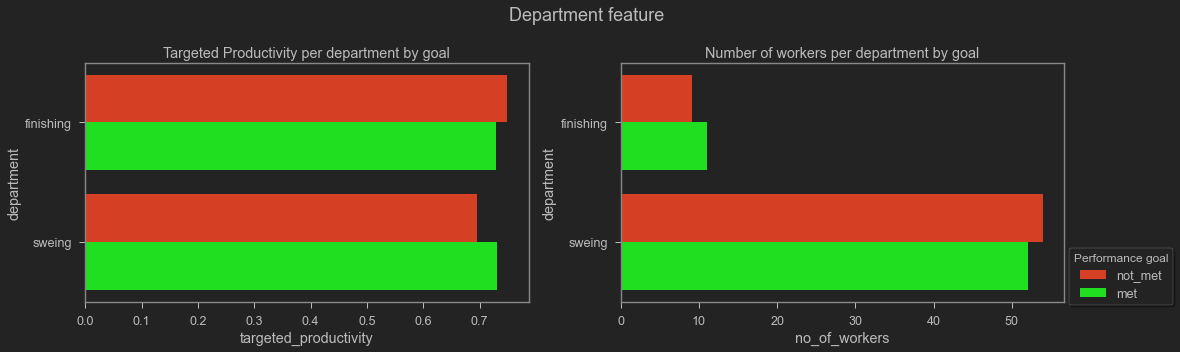

In [20]:
plt.figure(figsize=(16.5, 5))
plt.subplot(121)
ax = sns.barplot(data=df_eda,
                 y='department',
                 ci=0,
                 x='targeted_productivity',
                 hue='performance',
                 palette=cust_pal)
# remove legend
ax.legend([], [], frameon=False)
# add legend, ## comment out `remove legend` step and uncomment follwing code to add legend
# legend_labels, _ = ax.get_legend_handles_labels()
# ax.legend(
#     legend_labels,
#     ['not_met', 'met'],
#     bbox_to_anchor=(1.26, 1),
#     title_fontsize=12,
#     title='Performance')
ax.set_title('Targeted Productivity per department by goal')

plt.subplot(122, sharey=ax)
ax1 = sns.barplot(data=df_eda,
                  y='department',
                  x='no_of_workers',
                  hue='performance',
                  ci=0,
                  palette=cust_pal)
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['not_met', 'met'],
           title_fontsize=12,
           title='Performance goal',
           bbox_to_anchor=(1.26, .25),
           shadow=True,
           fancybox=True)
ax1.set_title('Number of workers per department by goal')

plt.suptitle('Department feature', size=18, weight=4)
plt.tight_layout()
plt.show()

### productive day of the week

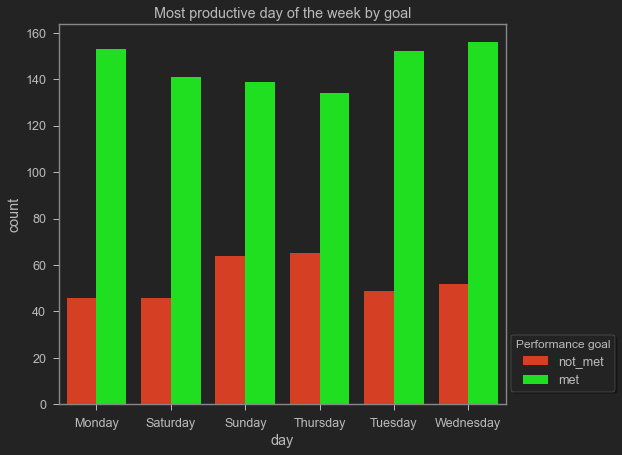

In [21]:
ax1 = sns.countplot(data=df_eda, hue='performance', x='day', palette=cust_pal)
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['not_met', 'met'],
           bbox_to_anchor=(1.26, .2),title_fontsize=12,title ='Performance goal',
           shadow=True,
           fancybox=True)
ax1.set_title('Most productive day of the week by goal')
plt.show()

### team size

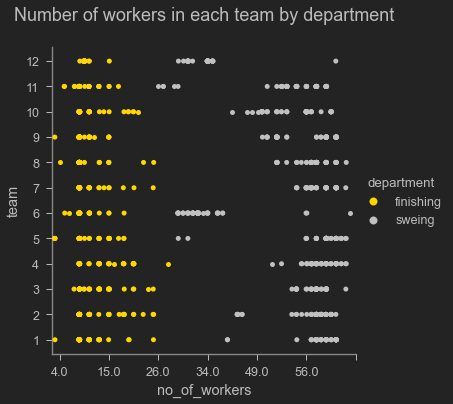

In [22]:
g = sns.catplot(data=df_eda,
                y='team',
                x='no_of_workers',
                hue='department',
                palette=cust_pal2)
plt.xticks(ticks=np.arange(1, 71, 10), rotation=0)
g.set(yticks=df_eda.team.unique())
plt.title(f'Number of workers in each team by department\n',size=18,weight=4)
plt.show()

### efficient team

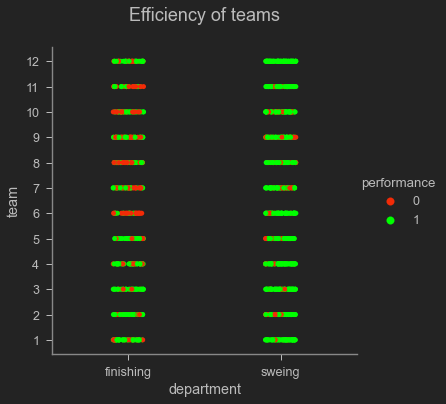

In [23]:
g = sns.catplot(data=df_eda,
                y='team',
                x='department',
                hue='performance',
                palette=cust_pal)
g.set(yticks=df_eda.team.unique())
plt.title(f'Efficiency of teams\n',size=18,weight=4)
plt.show()

### `smv` on performance

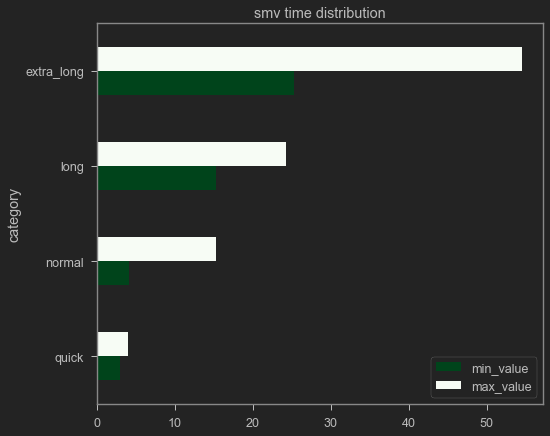

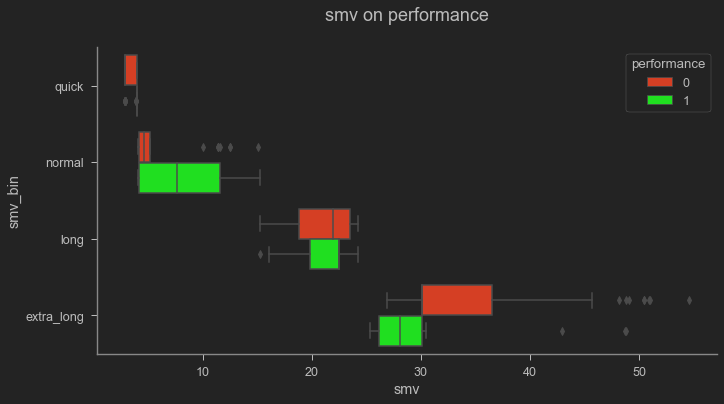

In [24]:
# empty list to hold data
lst = []
# preparing data of smv_bin distribution
for i in zip(df_eda.smv_bin.cat.categories,
             df_eda.groupby('smv_bin')['smv'].agg('min'),
             df_eda.groupby('smv_bin')['smv'].agg('max')):
    temp_dict = {'category': i[0], 'min_value': i[1], 'max_value': i[2]}
    lst.append(temp_dict)
# plotting
pd.DataFrame(lst).set_index('category').plot.barh(
    colormap='Greens_r', title='smv time distribution')
sns.catplot(y="smv_bin",
            x='smv',
            kind="box",
            hue="performance",
            data=df_eda,
            aspect=2,
            palette=cust_pal,
            legend_out=False)
plt.title(f'smv on performance\n', size=18, weight=4)
plt.show()

### wip on performance

,min_value,max_value
category,,
no_wip,0,0
small,7,148
med,154,486
large,507,2120
xl,2698,23122


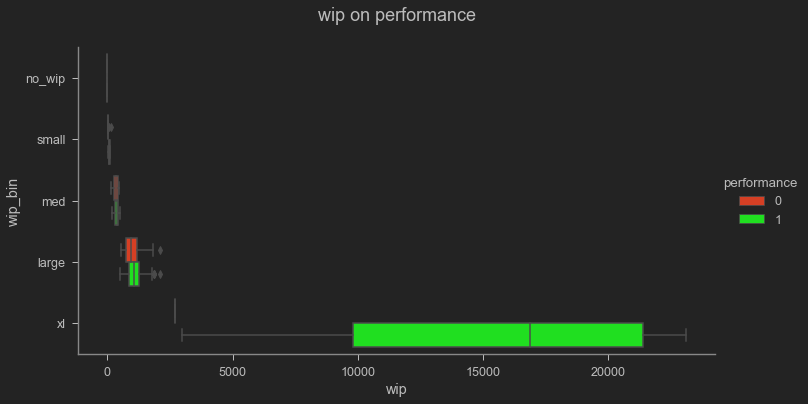

In [25]:
# empty list to hold data
lst = []
# preparing data of wip_bin distribution
for i in zip(df_eda.wip_bin.cat.categories,
             df_eda.groupby('wip_bin')['wip'].agg('min'),
             df_eda.groupby('wip_bin')['wip'].agg('max')):
    temp_dict = {'category': i[0], 'min_value': i[1], 'max_value': i[2]}
    lst.append(temp_dict)
display(
    pd.DataFrame(lst).set_index('category').style.format(
        "{:.0f}").set_properties(**{'color': 'lawngreen'}))
sns.catplot(y="wip_bin",
            x='wip',
            kind="box",
            hue="performance",
            data=df_eda,
            aspect=2,
            palette=cust_pal)
plt.title(f'wip on performance\n', size=18, weight=4)
plt.show()

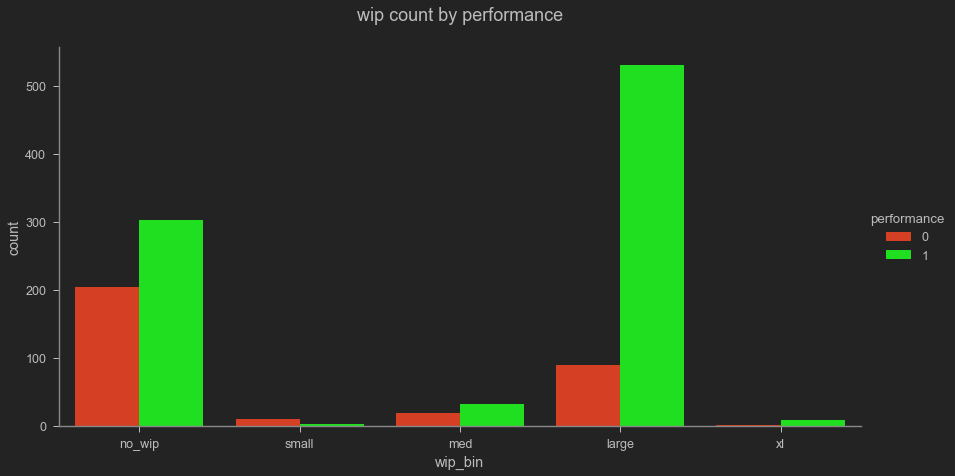

In [26]:
sns.catplot(x="wip_bin",
            kind="count",
            hue="performance",
            data=df_eda,
            aspect=2,
            height=6,
            palette=cust_pal)
plt.title(f'wip count by performance\n', size=18, weight=4)
plt.show()

### incentive on performance

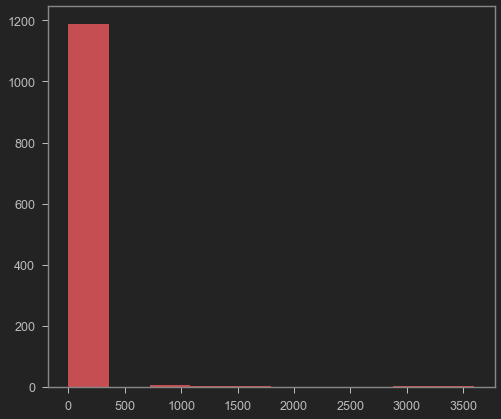

In [35]:
df_eda['incentive'].hist(color='r',grid=False);

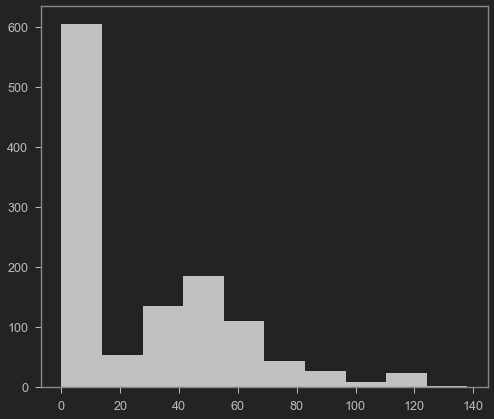

In [37]:
df_eda[df_eda['incentive']<500]['incentive'].hist(color='silver',grid=False);

In [42]:
print(
    f"""`incentive` and `performance` has a {df_eda[df_eda['incentive']<500]
.corr()['incentive']['performance'].round(4)} correlaiton"""
)

`incentive` and `performance` has a 0.4001 correlaiton


,min_value,max_value
category,,
no_incentive,0,29
minor,30,75
med,81,138
large,960,1440
generous,2880,3600


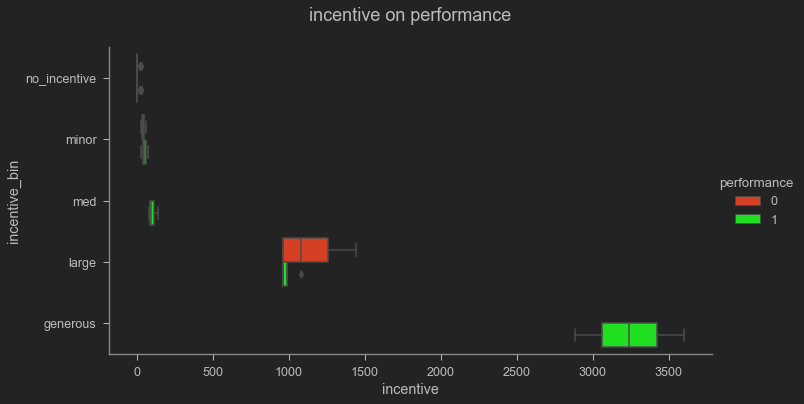

In [30]:
# empty list to hold data
lst = []
# preparing data of incentive_bin distribution
for i in zip(df_eda.incentive_bin.cat.categories,
             df_eda.groupby('incentive_bin')['incentive'].agg('min'),
             df_eda.groupby('incentive_bin')['incentive'].agg('max')):
    temp_dict = {'category': i[0], 'min_value': i[1], 'max_value': i[2]}
    lst.append(temp_dict)
display(
    pd.DataFrame(lst).set_index('category').style.format(
        "{:.0f}").set_properties(**{'color': 'lawngreen'}))
sns.catplot(y="incentive_bin",
            x='incentive',
            kind="box",
            hue="performance",
            data=df_eda,
            aspect=2,
            palette=cust_pal)
plt.title(f'incentive on performance\n', size=18, weight=4)
plt.show()